In [118]:
import jax.numpy as jnp
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

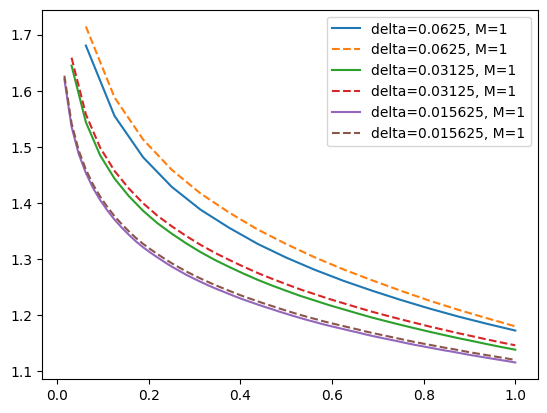

In [120]:
#######################
# Heading parameters. #
# Strong order proxy. #
#######################

solver_name = "EKF0"
problem_name = "IBM"
prefix = f"{solver_name}_{problem_name}"
folder = "./"

deltas = 1/jnp.array([16, 32, 64])
Ns = 1/deltas
fineN = Ns**1.0
Mdeltas = jnp.ones((len(deltas),)) * (Ns)**0
T = 1.0
Ndeltas = T/deltas

for n in range(len(Ndeltas)):
    delta = deltas[n]
    N = int(Ndeltas[n])
    M = int(Mdeltas[n])
    fine = int(fineN[n])
    paths_1 = jnp.load(f'{folder}/{prefix}_pathwise_sols_{N}_{fine}.npy')
    paths_2 = jnp.load(f'{folder}/{prefix}_IOUP_pathwise_sols2_{N}_{M}.npy')
    paths_3 = jnp.load(f'{folder}/{prefix}_Matern32_pathwise_sols2_{N}_{M}.npy')
    N = int(N)
    N += 1
    assert N == len(paths_1[0]) == len(paths_2[0])
    ts = jnp.linspace(0, T, N)
    ranged = range(N)
    plt.plot(ts, jnp.log(jnp.mean(jnp.linalg.norm(paths_1 - paths_2, axis=-1), axis=0)) / jnp.log(delta),
             label=f'delta={delta}, M={M}')
    
    plt.plot(ts, jnp.log(jnp.mean(jnp.linalg.norm(paths_1 - paths_3, axis=-1), axis=0)) / jnp.log(delta),
             label=f'delta={delta}, M={M}', linestyle='--')
plt.legend()

[1.0008799]
[1.5002661]
[2.2176127]
[0.99935704]
[1.4510734]
[1.9697871]


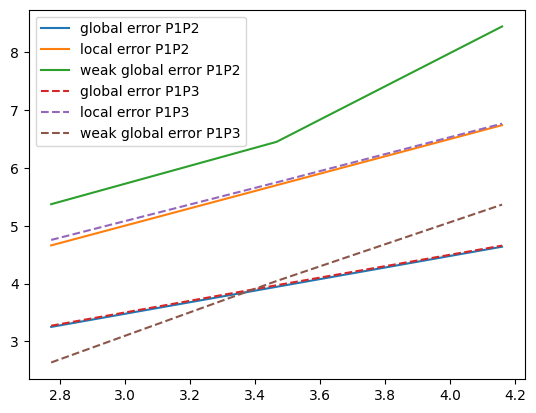

In [123]:
###########################
# Weak and global errors  #
# With log-log regression.#
###########################

STRONG_GLOBAL_ERRORS_P1P2 = []
STRONG_LOCAL_ERRORS_P1P2 = []
WEAK_GLOBAL_ERRORS_P1P2 = []

STRONG_GLOBAL_ERRORS_P1P3 = []
STRONG_LOCAL_ERRORS_P1P3 = []
WEAK_GLOBAL_ERRORS_P1P3 = []
@partial(jnp.vectorize, signature="(d,x)->(d,d)")
def WEAK_POLYNOMIAL(x):
    return x @ x.T


for n in range(len(deltas)):
    N = int(Ndeltas[n])
    M = int(Mdeltas[n])
    fine = int(fineN[n])
    paths_1 = jnp.load(f'{folder}/{prefix}_pathwise_sols_{N}_{fine}.npy')
    paths_2 = jnp.load(f'{folder}/{prefix}_IOUP_pathwise_sols2_{N}_{M}.npy')
    paths_3 = jnp.load(f'{folder}/{prefix}_Matern32_pathwise_sols2_{N}_{M}.npy')
    STRONG_GLOBAL_ERROR_P1P2 = jnp.mean(jnp.linalg.norm(paths_2 - paths_1, axis=-1), axis=0)[-1]
    STRONG_LOCAL_ERROR_P1P2 = jnp.mean(jnp.linalg.norm(paths_2[:, 1] - paths_1[:, 1], axis=-1), axis=0)
    
    STRONG_GLOBAL_ERROR_P1P3 = jnp.mean(jnp.linalg.norm(paths_3 - paths_1, axis=-1), axis=0)[-1]
    STRONG_LOCAL_ERROR_P1P3 = jnp.mean(jnp.linalg.norm(paths_3[:, 1] - paths_1[:, 1], axis=-1), axis=0)
    
    MOMENT_P1 = WEAK_POLYNOMIAL(paths_1[...,jnp.newaxis])
    MOMENT_P2 = WEAK_POLYNOMIAL(paths_2[...,jnp.newaxis])
    MOMENT_P3 = WEAK_POLYNOMIAL(paths_3[...,jnp.newaxis])
    
    WEAK_GLOBAL_ERROR_P1P2 = jnp.max(jnp.linalg.norm(jnp.linalg.norm(jnp.mean(MOMENT_P2, axis=0)-jnp.mean(MOMENT_P1, axis=0),axis=-1),axis=-1),axis=-1)
    
    WEAK_GLOBAL_ERROR_P1P3 = jnp.max(jnp.linalg.norm(jnp.linalg.norm(jnp.mean(MOMENT_P3, axis=0)-jnp.mean(MOMENT_P1, axis=0),axis=-1),axis=-1),axis=-1)
    
    STRONG_GLOBAL_ERRORS_P1P2.append(STRONG_GLOBAL_ERROR_P1P2)
    STRONG_LOCAL_ERRORS_P1P2.append(STRONG_LOCAL_ERROR_P1P2)
    WEAK_GLOBAL_ERRORS_P1P2.append(WEAK_GLOBAL_ERROR_P1P2)
    
    STRONG_GLOBAL_ERRORS_P1P3.append(STRONG_GLOBAL_ERROR_P1P3)
    STRONG_LOCAL_ERRORS_P1P3.append(STRONG_LOCAL_ERROR_P1P3)
    WEAK_GLOBAL_ERRORS_P1P3.append(WEAK_GLOBAL_ERROR_P1P3)
    
STRONG_GLOBAL_ERRORS_P1P2 = jnp.array(STRONG_GLOBAL_ERRORS_P1P2)
STRONG_LOCAL_ERRORS_P1P2 = jnp.array(STRONG_LOCAL_ERRORS_P1P2)
WEAK_GLOBAL_ERRORS_P1P2 = jnp.array(WEAK_GLOBAL_ERRORS_P1P2)

STRONG_GLOBAL_ERRORS_P1P3 = jnp.array(STRONG_GLOBAL_ERRORS_P1P3)
STRONG_LOCAL_ERRORS_P1P3 = jnp.array(STRONG_LOCAL_ERRORS_P1P3)
WEAK_GLOBAL_ERRORS_P1P3 = jnp.array(WEAK_GLOBAL_ERRORS_P1P3)

plt.plot(-jnp.log(deltas), -jnp.log(STRONG_GLOBAL_ERRORS_P1P2), label='global error P1P2')
plt.plot(-jnp.log(deltas), -jnp.log(STRONG_LOCAL_ERRORS_P1P2), label='local error P1P2')
plt.plot(-jnp.log(deltas), -jnp.log(WEAK_GLOBAL_ERRORS_P1P2), label='weak global error P1P2')

plt.plot(-jnp.log(deltas), -jnp.log(STRONG_GLOBAL_ERRORS_P1P3), label='global error P1P3', linestyle='--')
plt.plot(-jnp.log(deltas), -jnp.log(STRONG_LOCAL_ERRORS_P1P3), label='local error P1P3', linestyle='--')
plt.plot(-jnp.log(deltas), -jnp.log(WEAK_GLOBAL_ERRORS_P1P3), label='weak global error P1P3', linestyle='--')
plt.legend()

linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_GLOBAL_ERRORS_P1P2))
print(linear_regressor.coef_)
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_LOCAL_ERRORS_P1P2))
print(linear_regressor.coef_)
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(WEAK_GLOBAL_ERRORS_P1P2))
print(linear_regressor.coef_)


linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_GLOBAL_ERRORS_P1P3))
print(linear_regressor.coef_)
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(STRONG_LOCAL_ERRORS_P1P3))
print(linear_regressor.coef_)
linear_regressor = LinearRegression().fit(-jnp.log(deltas).reshape(-1, 1), -jnp.log(WEAK_GLOBAL_ERRORS_P1P3))
print(linear_regressor.coef_)

In [71]:
jnp.save(f'{prefix}_STRONG_GLOBAL_ERRORS', jnp.array([deltas, STRONG_GLOBAL_ERRORS_P1P2]))
jnp.save(f'{prefix}_STRONG_LOCAL_ERRORS', jnp.array([deltas, STRONG_LOCAL_ERRORS_P1P2]))
jnp.save(f'{prefix}_WEAK_GLOBAL_ERRORS', jnp.array([deltas, WEAK_GLOBAL_ERRORS_P1P2]))

ValueError: All input arrays must have the same shape.

In [64]:
STRONG_GLOBAL_ERRORS = jnp.load(f'{prefix}_STRONG_GLOBAL_ERRORS.npy')
STRONG_LOCAL_ERRORS = jnp.load(f'{prefix}_STRONG_LOCAL_ERRORS.npy')
WEAK_GLOBAL_ERRORS = jnp.load(f'{prefix}_WEAK_GLOBAL_ERRORS.npy')
#WEAK_GLOBAL_ERRORS_P1GroundTruth = jnp.load(f'{prefix}_WEAK_GLOBAL_ERRORS_P1GroundTruth.npy')

np.savetxt(f'{prefix}_STRONG_GLOBAL_ERRORS.csv', STRONG_GLOBAL_ERRORS.T, delimiter=',', header='deltas,errors', comments="")
np.savetxt(f'{prefix}_STRONG_LOCAL_ERRORS.csv', STRONG_LOCAL_ERRORS.T, delimiter=',', header='deltas,errors', comments="")
np.savetxt(f'{prefix}_WEAK_GLOBAL_ERRORS.csv', WEAK_GLOBAL_ERRORS.T, delimiter=',', header='deltas,errors', comments="")
#np.savetxt(f'{prefix}_WEAK_GLOBAL_ERRORS_P1GroundTruth.csv', WEAK_GLOBAL_ERRORS_P1GroundTruth.T, delimiter=',', header='deltas,errors', comments="")

FileNotFoundError: [Errno 2] No such file or directory: 'EKF0_DoubleIBM_STRONG_GLOBAL_ERRORS.npy'

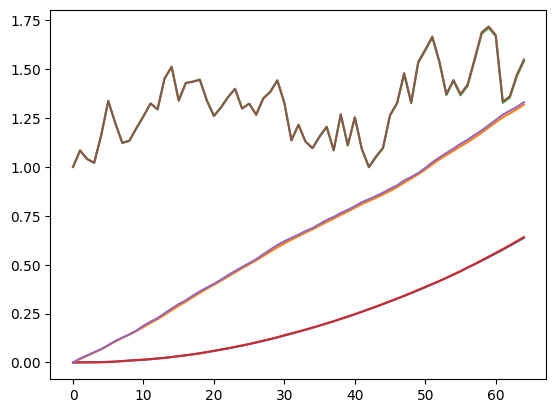

In [75]:
###############
# Sample path #
###############

plt.plot(paths_1[10]) # Approximation
plt.plot(paths_2[10]) # Fine solution.

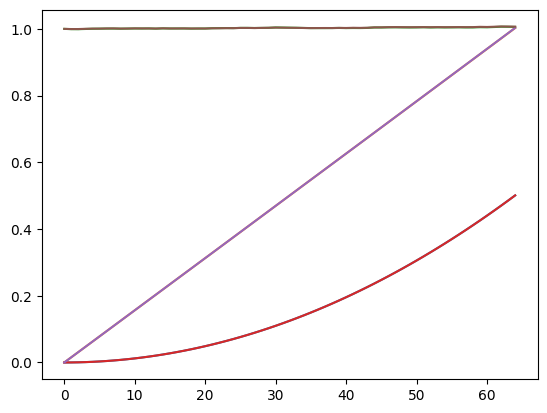

In [66]:
###################
# Mean trajectory #
###################
plt.plot(jnp.mean(paths_2, axis=0))

plt.plot(jnp.mean(paths_1, axis=0))

In [67]:
ts = jnp.insert(jnp.linspace(1/1024, 1, 1024),0,0)
np.savetxt(f'{prefix}_correct_mean_first.csv', jnp.array([ts, jnp.mean(paths_2[:,:,0], axis=0)]).T, delimiter=',', header='t,mean', comments="")
np.savetxt(f'{prefix}_correct_mean_secnd.csv', jnp.array([ts, jnp.mean(paths_2[:,:,1], axis=0)]).T, delimiter=',', header='t,mean', comments="")
np.savetxt(f'{prefix}_incorrect_mean_first.csv', jnp.array([ts, jnp.mean(paths_1[:,:,0], axis=0)]).T, delimiter=',', header='t,mean', comments="")
np.savetxt(f'{prefix}_incorrect_mean_secnd.csv', jnp.array([ts, jnp.mean(paths_1[:,:,1], axis=0)]).T, delimiter=',', header='t,mean', comments="")

ValueError: All input arrays must have the same shape.

In [ ]:
plt.plot(ts, paths_2[0,:,0], label='correct mean first')
plt.plot(ts, paths_2[0,:,1], label='correct mean second')

In [ ]:
np.savetxt(f'{prefix}_path_0.csv', jnp.array([ts, paths_2[0,:,0]]).T, delimiter=',', header='t,mean', comments="")
np.savetxt(f'{prefix}_path_1.csv', jnp.array([ts, paths_2[0,:,1]]).T, delimiter=',', header='t,mean', comments="")

In [7]:
import pandas as pd

solver_name = "EKF1_SSM"
problem_name = "FHN"
prefix = f"{solver_name}_{problem_name}"
folder = "./EKF1_FHN"

print(prefix)
#res_global_error = pd.read_csv(f'{folder}/{prefix}_STRONG_GLOBAL_ERRORS.csv', index_col=False, header=0)
#res_local_error = pd.read_csv(f'{folder}/{prefix}_STRONG_LOCAL_ERRORS.csv', index_col=False, header=0)
res_weak_error = pd.read_csv(f'{folder}/{prefix}_WEAK_GLOBAL_ERRORS.csv', index_col=False, header=0)



EKF1_SSM_FHN


FileNotFoundError: [Errno 2] No such file or directory: './EKF1_FHN/EKF1_SSM_FHN_WEAK_GLOBAL_ERRORS.csv'

In [ ]:
def summary(df):
    regr = LinearRegression()
    X = jnp.log(df.deltas.values).reshape(6, 1)
    Y = jnp.log(df.errors.values).reshape(6,1)
    regr.fit(X, Y)
    var_ = jnp.sqrt(1/4*jnp.sum((regr.predict(X)-Y)**2,axis=0))
    return regr.coef_, regr.intercept_, var_, regr.score(X, Y)
#print('STRONG LOCAL')
#print(summary(res_local_error))
#print('STRONG GLOBAL')
#print(summary(res_global_error))
print('WEAK GLOBAL')
print(summary(res_weak_error))

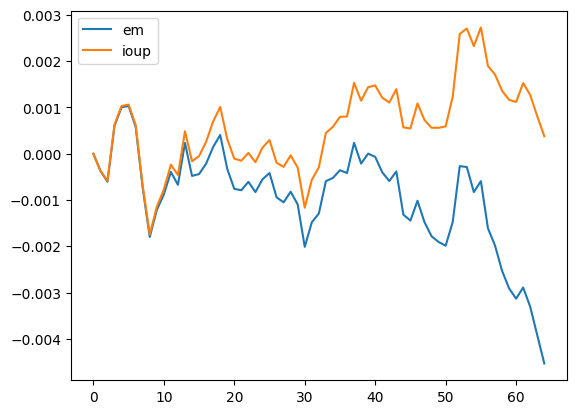

In [84]:
plt.plot(paths_1[10][:,0]-paths_2[10][:,0], label='em')
plt.plot(paths_1[10][:,0]-paths_3[10][:,0], label='ioup')
plt.legend()

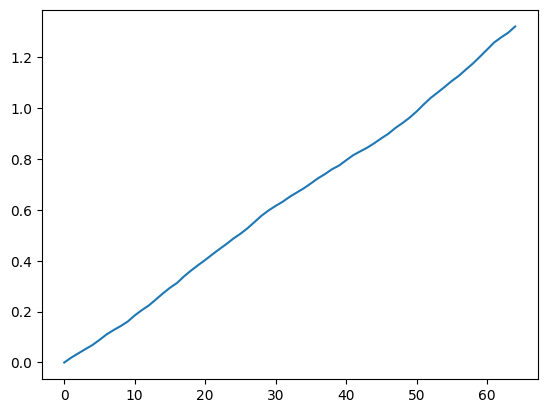

In [82]:
plt.plot(paths_3[10][:,1])

In [94]:
(paths_1[:,:,0] - paths_2[:,:,0]).shape

(100000, 17)

In [89]:
paths_1

(100000, 17, 3)

In [100]:
jnp.log(jnp.mean(jnp.linalg.norm(paths_1[:,:,0] - paths_2[:,:,0], axis=-1), axis=0))

Array(-2.8010008, dtype=float32)

ValueError: x and y must have same first dimension, but have shapes (17,) and (1,)

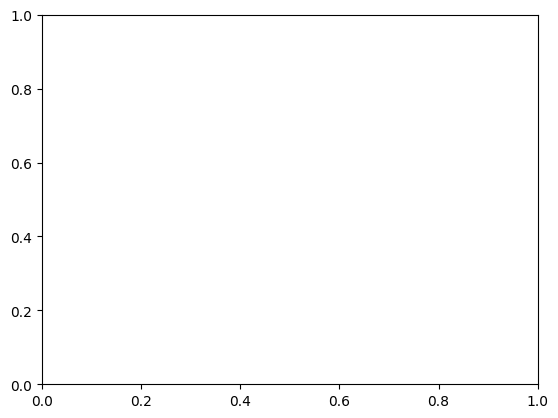

In [102]:
plt.plot(ts, jnp.log(jnp.mean(jnp.linalg.norm(paths_1[:,:,0] - paths_2[:,:,0], axis=-1), axis=0)) / jnp.log(delta),
             label=f'delta={delta}, M={M}')

In [104]:
jnp.linalg.norm(paths_1[:,:,0] - paths_2[:,:,0], axis=0).shape

(100000,)

In [105]:
jnp.mean(jnp.linalg.norm(paths_1 - paths_2, axis=-1), axis=0).shape

(17,)

In [109]:
jnp.mean(jnp.abs(paths_1[:,:,0] - paths_2[:,:,0]), axis=-1)

Array([0.02330887, 0.00992648, 0.00542038, ..., 0.01368056, 0.00517711,
       0.02036827], dtype=float32)